## Load Data

In [4]:
import pandas as pd
from sqlalchemy import create_engine
import MySQLdb
import numpy as np

engine = create_engine('mysql://martin@127.0.0.1:3307/redbook?charset=utf8')
df = pd.read_sql_query('SELECT * FROM profiles', engine)
df = df.drop_duplicates(subset='profile_id')
df.head()


,id,__url,__time,fans_number,profile_name,posts_number,boards,collected,description,gender,profile_id,avatar_url,avatar_small,total_likes,location,verified,__pk,__version
0,1,http://www.xiaohongshu.com/web_api/sns/v1/user...,1531212653,68449,JJ,88,1,117650,☻JILL / 毕业于瑞士??/ @Jwjil / Instagram: amllij / ...,2,582db5c25e87e7642ffa7d68,https://img.xiaohongshu.com/avatar/582db5c25e8...,https://img.xiaohongshu.com/avatar/582db5c25e8...,70256,南韓,false,147c6812ea023a4f5f94c6aedf4043e5,0
1,2,http://www.xiaohongshu.com/web_api/sns/v1/user...,1531212654,12046,沙鸥,15,1,6269,48岁对美好事物的分享/ ccrystal0120@163.com,1,5a95de7c11be10085d6c6656,https://img.xiaohongshu.com/avatar/5b3ce846d2c...,https://img.xiaohongshu.com/avatar/5b3ce846d2c...,8915,地球的某一片红薯地,false,85e1bd4f19bd421f2b2ff8173e343470,0
2,3,http://www.xiaohongshu.com/web_api/sns/v1/user...,1531212655,5,Enjoy一,0,1,0,来了就不要走啦,1,5a900cbee8ac2b1faa7a620f,https://img.xiaohongshu.com/avatar/5a900cbee8a...,https://img.xiaohongshu.com/avatar/5a900cbee8a...,0,中国,false,713ad03112ed49522fbc7e5880204c24,0
3,4,http://www.xiaohongshu.com/web_api/sns/v1/user...,1531212656,3051590,薯队长,1534,69,539693,小红书官方账号。有任何问题都可以通过邮箱或“设置-意见反馈”联系队长哦。队长邮箱shudui...,0,52d8c541b4c4d60e6c867480,https://img.xiaohongshu.com/avatar/57a1becd805...,https://img.xiaohongshu.com/avatar/57a1becd805...,2896886,上海,true,6354a7f4de9e155666bf10876d0690b3,0
4,5,http://www.xiaohongshu.com/web_api/sns/v1/user...,1531212657,3152050,生活薯,1647,238,1785905,小红书官方账号 | 分享各种出门浪，小红薯们最好的品质生活进阶指南～,2,56826634cb35fb7e671d6bfc,https://img.xiaohongshu.com/avatar/57a1bfe2805...,https://img.xiaohongshu.com/avatar/57a1bfe2805...,597564,地球某处,true,7d46c2f42d3afe0cfc00ee05b861ab73,0


## Change to number format

In [485]:
cols = ['fans_number', 'posts_number', 'boards', 'collected', 'gender', 'total_likes']
for col in cols:
   df[col] = df[col].apply(lambda x: int(x) if x == x else "")

## Configure Variables

In [7]:
import os

GRAPH_DIR = '/Users/Martin/code/scripts/redbook_graphs/'

pink = '#f24299'
gray = 'gray'
blue = '#424ff2'

## I. Gender Analysis

### 1. The distribution of male and female user

#### 1.1. Distribution

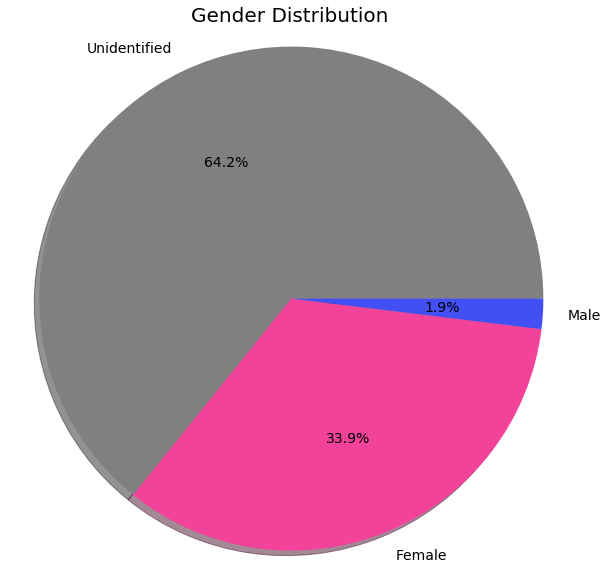

In [495]:
colors = [gray, pink, blue]
plt = df.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='Gender Distribution', labels=['Unidentified','Female','Male'],legend='', colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'geneder_distribution.jpg'))

#### 1.2 Distribution without undefined

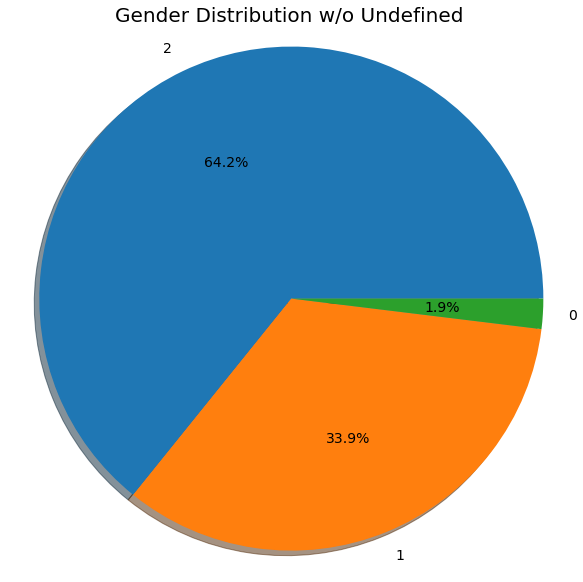

In [8]:
colors = [pink, blue]
plt = df[df.gender != 2].gender.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='Gender Distribution w/o Undefined', labels=['Female', 'Male'],legend='', colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'geneder_distribution_wo_undef.jpg'))

### 2. Total Likes by genders

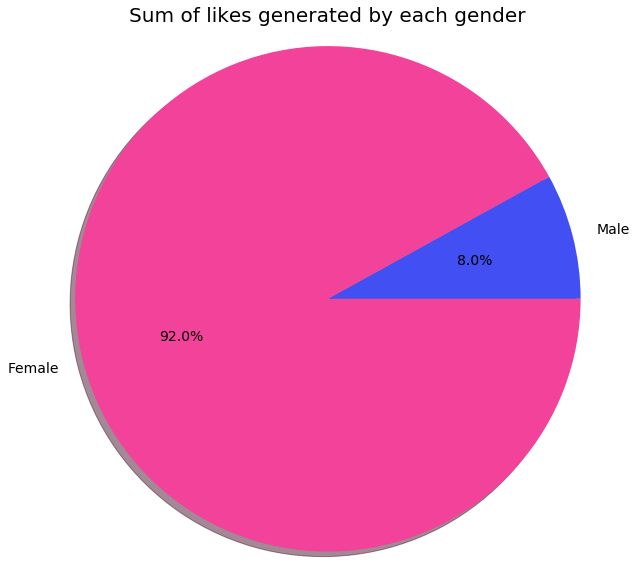

In [497]:
colors = [blue, pink]
plt = df[df.gender != 2].groupby('gender')['total_likes'].sum().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='Sum of likes generated by each gender', labels=['Male', 'Female'],legend='', colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'gender_likes.jpg'))

### 3. Total collected by genders

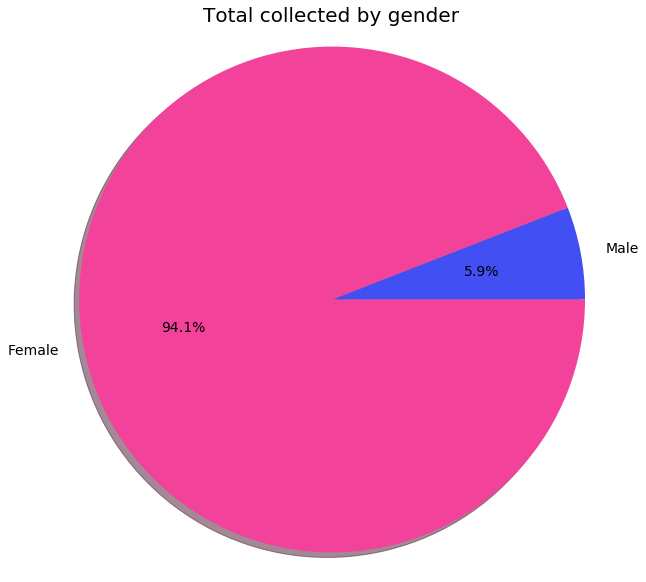

In [498]:
colors = [blue, pink]
plt = df[df.gender != 2].groupby('gender')['collected'].sum().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='Total collected by gender', labels=['Male', 'Female'],legend='', colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'gender_collected.jpg'))

### 4. Total fans number by gender

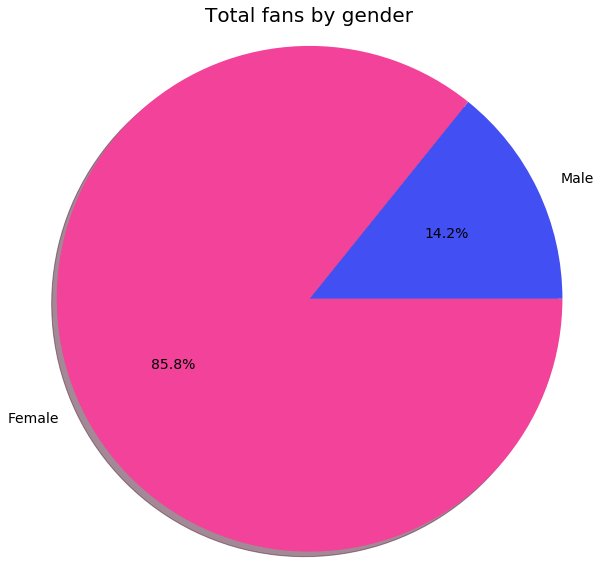

In [499]:
colors = [blue, pink]
plt = df[df.gender != 2].groupby('gender')['fans_number'].sum().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='Total fans by gender', labels=['Male', 'Female'],legend='', colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'gender_fans_number.jpg'))

In [505]:
df[df.gender != 2].groupby('gender')['fans_number'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,17402.0,2443.376623,54614.411730,0.0,1.0,5.0,17.0,5067245.0
1,304567.0,842.971822,33001.537039,0.0,4.0,11.0,33.0,10384581.0


### 5. Users Distribution with 10+ fans 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


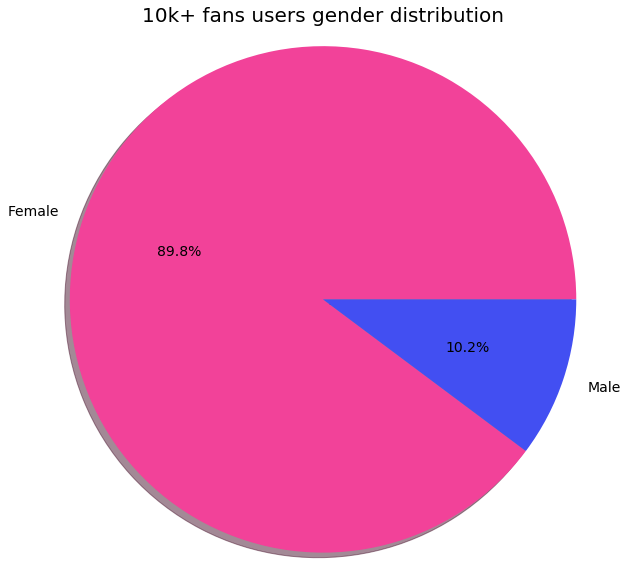

In [502]:
colors = [pink, blue]
plt = df[df.gender != 2][df.fans_number > 10000].gender.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='10k+ fans users gender distribution', labels=['Female', 'Male'],legend='',colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'gender_by_fans_number_over_10000.jpg'))

### 6. User Distribution with 100k+ fans

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


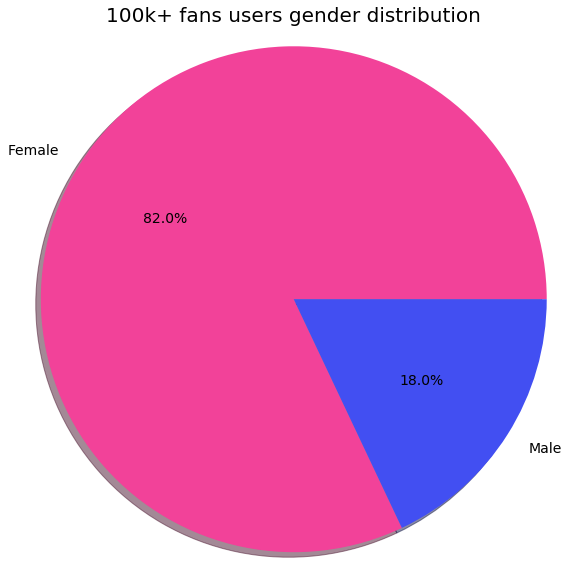

In [506]:
colors = [pink, blue]
plt = df[df.gender != 2][df.fans_number > 100000].gender.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
        fontsize=14, title='100k+ fans users gender distribution', labels=['Female', 'Male'],legend='',colors=colors)
plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'gender_by_fans_number_over_100000.jpg'))

## II. Location Analysis

### I. Build Location parser

#### Build Province & Country dict

In [508]:
"""
    Redbook follows a rather strange way to collect people's location. There are English location, Chinese location,
    location w/o provinces, cities, etc.. 
    It also defaults some users location to differnt places. 
"""


provinces = {}
with open('/Users/Martin/Desktop/province.txt', 'r') as f:
    lines = [_.strip().split(' ') for _ in f.read().split('\n')]
    for l in lines:
        provinces[l[-1]] = ' '.join(l[:-1])

countries = {}
with open('/Users/Martin/Desktop/countries.txt', 'r') as f:
    lines = [_.strip().split('\t') for _ in f.read().split('\n')]
    for l in lines:
        countries[l[1]] = l[0]

#### Build location parser function

In [509]:
locations = {}
locations.update(provinces)
locations.update(countries)
def get_location(raw_loc):
    for loc in locations.keys():
        if loc in raw_loc:
            return locations[loc]
    for loc in locations.values():
        if loc in raw_loc:
            return loc
    if raw_loc == "地球的某一片红薯地" or raw_loc == "其他" or raw_loc == '地球某处':
        return "Others"
    if "CN" in raw_loc or raw_loc == "China" or 'zh-cn' in raw_loc:
        return "China"
    if '深圳' in raw_loc or '广州' in raw_loc:
        return 'Guangdong'
    if '南京' in raw_loc or '苏州' in raw_loc or '杭州' in raw_loc:
        return 'Zhejiang'
    if '海外' in raw_loc:
        return 'Abroad'

    return raw_loc

### 2. Location Distribution

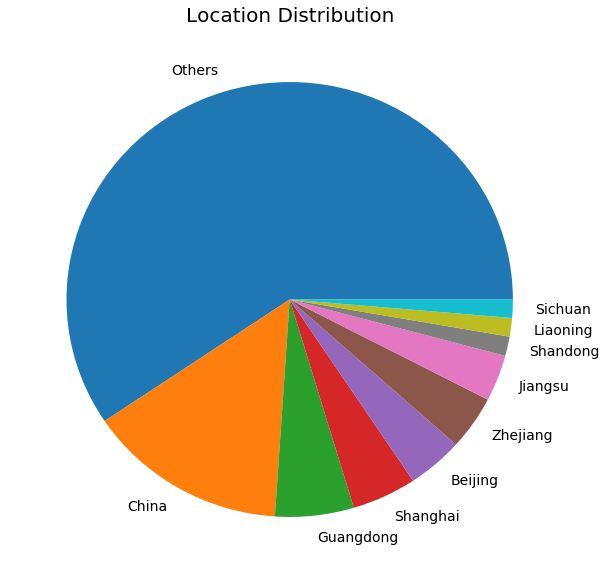

In [510]:
df['std_loc'] = df.std_loc = df['location'].apply(get_location)

explode = (0, 0, 0.2,0.1,0.1,0.2,0.3,0.4,0.6,0.7)
plt = df.std_loc.value_counts().head(10).plot(kind='pie',
        fontsize=14, title='Location Distribution', legend='')
plt.set_ylabel('')
plt.set_xlabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'location_distribution.jpg'))


### 3. Location w/o China and others

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


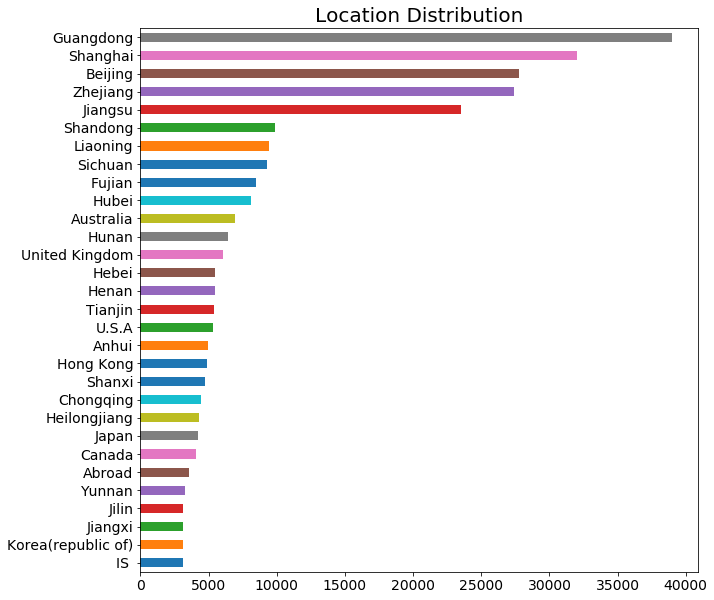

In [514]:
plt = df[df.std_loc != 'China'][df.std_loc != 'Others']['std_loc'].value_counts().head(30).sort_values().plot(kind='barh',
        fontsize=14, title='Location Distribution', legend='')
plt.set_ylabel('')
plt.set_xlabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'location_distribution_wo_china.jpg'))

### 4. Total Likes generated by each location

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


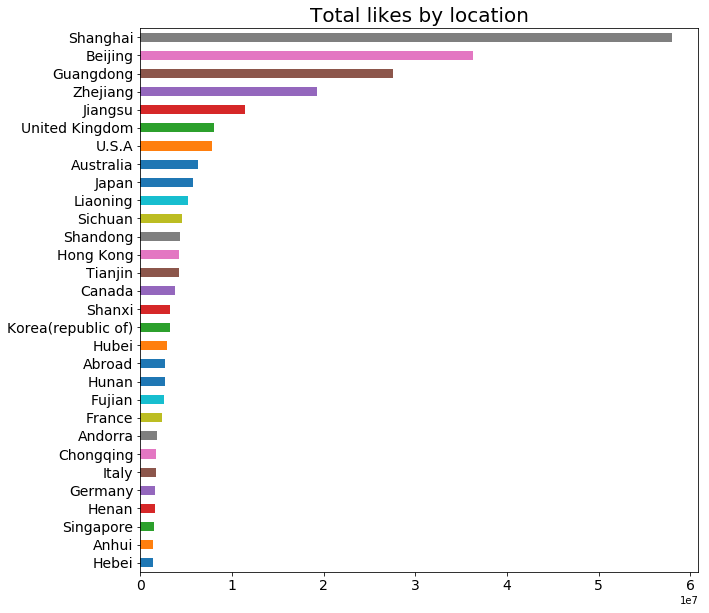

In [515]:
plt = df[df.std_loc != 'China'][df.std_loc != 'Others'].groupby('std_loc')['total_likes'].sum().sort_values(ascending=False).head(30).sort_values().plot(kind='barh',
        fontsize=14, title='Total likes by location', legend='')
# plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'likes_by_location.jpg'))


### 5. Total collected generated by location

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


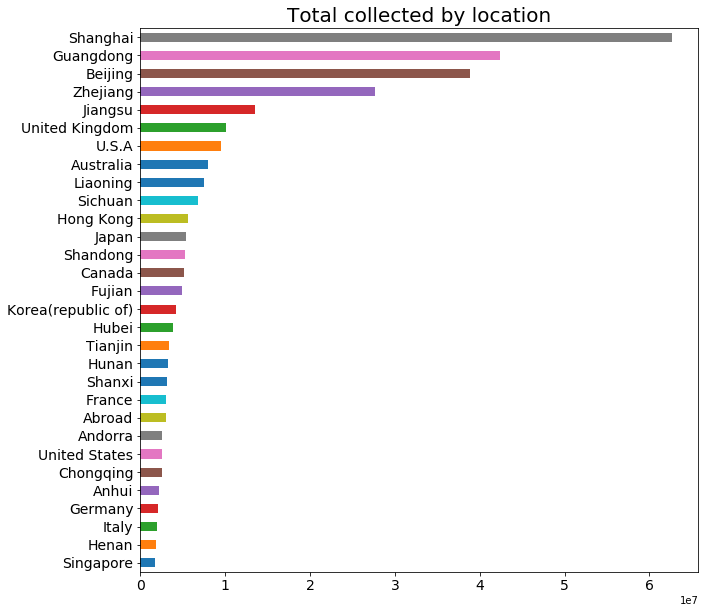

In [516]:
plt = df[df.std_loc != 'China'][df.std_loc != 'Others'].groupby('std_loc')['collected'].sum().sort_values(ascending=False).head(30).sort_values().plot(kind='barh',
        fontsize=14, title='Total collected by location', legend='')
# plt.axis('equal')
plt.set_ylabel('')
plt.title.set_size(20)
fig = plt.figure
fig.set_size_inches(10,10)
fig.savefig(os.path.join(GRAPH_DIR, 'collected_by_location.jpg'))

### 6. Fans number distribution

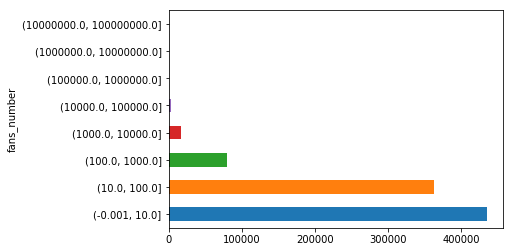

In [128]:
bins = [0,10,100,1000,10000,100000,1000000,10000000,100000000]
fans_cut = pd.cut(df['fans_number'], bins, include_lowest=True)
xl = {
    '0': "none",
    '10': 'some',
}
df.groupby(fans_cut).size().plot(kind='barh')